In [4]:
##Get them stats in here
import numpy as np 
import pandas as pd 
from scipy import stats
import statsmodels.api as sm
import matplotlib.pylab as plt 
from patsy import dmatrices
%matplotlib inline

# In Class Regression Example 1: Cars

### Background
At this point, we've discussed the general idea of a simple linear regression and seen a quick worked example.

What is the best line of the form $y=mx+b$ to draw through a set of data?

> We construct a line that minimizes $\sum(y-(mx+b))^2$ and we suggest the model:

> $y_i= \beta_0 + \beta_1 x_i + \varepsilon_i$

> where $\varepsilon_i \stackrel{iid}{\sim} N(0, \sigma^2)$.

This model has 4 latent assumptions:

1. Linearity makes sense.
2. The $\varepsilon$'s are actually normal.
3. The $\varepsilon$'s don't vary with $x$.
4. The $\varepsilon$'s are independent.



Our goal is to hit this problem with our general flow chart!

![title](img/MLRFLow.JPG)

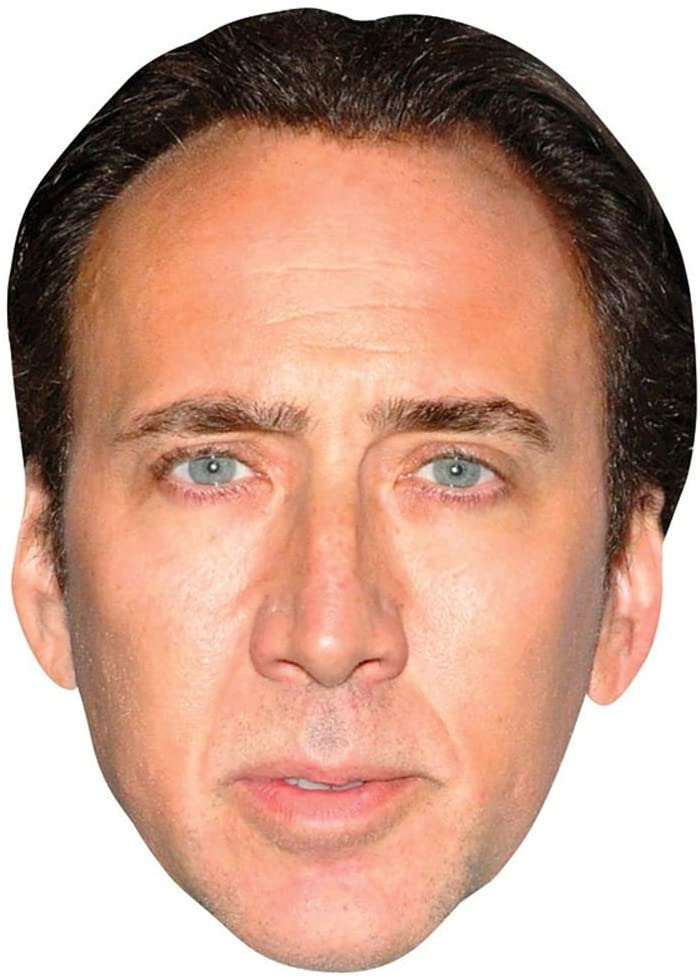

In [7]:
from IPython.display import Image
Image(filename = "MLRFLow.JPG", width=800, height=1600)


## Exploration

   speed  dist
0      4     2
1      4    10
2      7     4
3      7    22
4      8    16
5      9    10
6     10    18
7     10    26
8     10    34
9     11    17


Text(0, 0.5, 'distance')

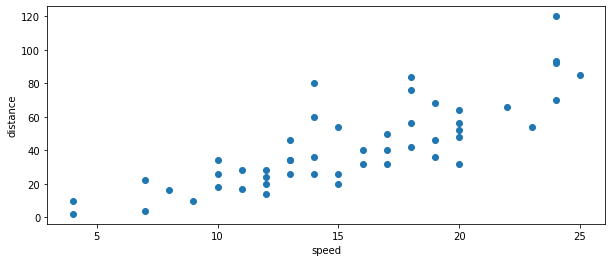

In [6]:
cars=pd.read_csv('../Data/cars.csv', usecols=(1,2))
print(cars.head(10))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
plt.scatter(cars['speed'], cars['dist'])
ax.set_xlabel('speed')
ax.set_ylabel('distance')

# Make a Simple Linear Model

The dmatrices function uses similar syntax to R.  The ~ is the same one we use when saying things like $Z \sim N(0,1)$.  We mean that "The model for Y is random with normally distributed errors, but the mean for each Y is a linear function of speed."

In [29]:
#dmatrices syntax: "distance is distributed as speed" (plus constant and error, implied)
y, Xmat = dmatrices('dist ~ speed', data=cars, return_type='dataframe')
print(Xmat.head())
slr=sm.OLS(y, Xmat).fit()
slr.summary()

   Intercept  speed
0        1.0    4.0
1        1.0    4.0
2        1.0    7.0
3        1.0    7.0
4        1.0    8.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           1.49e-12
Time:                        10:34:21   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#alternatively, can use the sm.add_constant syntax:
slr=sm.OLS(y, sm.add_constant(cars['speed'])).fit()
slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           1.49e-12
Time:                        10:26:37   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Diagnose the Model

### Question 1: Is it Linear?

**Tool:** plot the variables.  If there are multiple, use `seaborn.pairplot`.

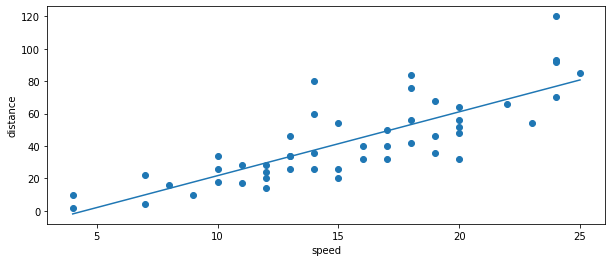

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))

#plot the data
plt.scatter(cars['speed'], cars['dist'])
ax.set_xlabel('speed')
ax.set_ylabel('distance')

#plot our fit
plt.plot(cars['speed'], slr.fittedvalues)

Looks... OK?  We'll revisit.

### Question 2: Are Residuals Normally Distributed?

For this we are using QQ plots and histograms.  A QQ plot is created from `sm.qqplot` on our linear fit.

0.9986501019683699


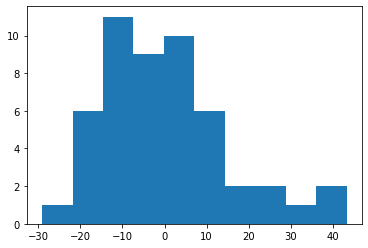

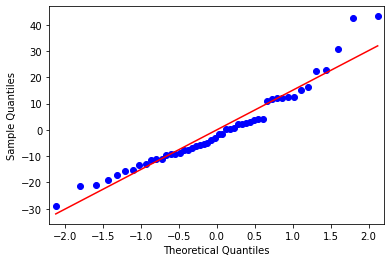

In [11]:
#look for outliers at tails (skew) or missing near the middle (kurtosis)
plt.hist(slr.resid)

sm.qqplot(slr.resid, stats.t, distargs=(len(y)-2,), line='s')
#vertical deviations represent extremity in the data
print(stats.norm.cdf(3))

The histogram is concerning, and suggests right-skew in our errors.  We see this with the pair of data points with large sample quantiles sitting nearly 2 standard deviations away from the mean in the QQ plot.

### Questions 3 & 4: Do Residuals vary with $Y$ or with $X$?
We want to make a couple of other important plots.  

## In the Residuals vs. Fitted Values plot (top-right), we can compare the predicted $Y_i$ against their errors.  If our model tends to have similar errors in similar regions (**clusters** of plus versus minus), this assumption is violated.  We also plot the magnitude of residuals against the $Y$ or $X$ values to answer whether or not the variance of the error is increasing or decreasing or otherwise **moving** with respect to $X$ or $Y$.

Text(0, 0.5, 'Residual')

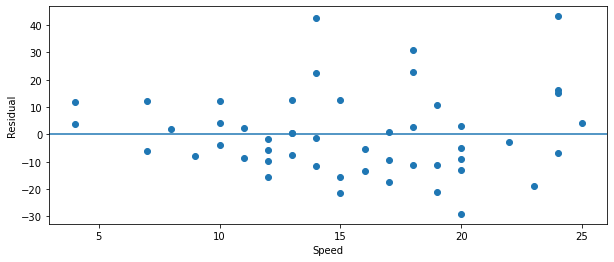

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
plt.scatter(cars['speed'], slr.resid)
plt.axhline(0)
ax.set_xlabel('Speed')
ax.set_ylabel('Residual')

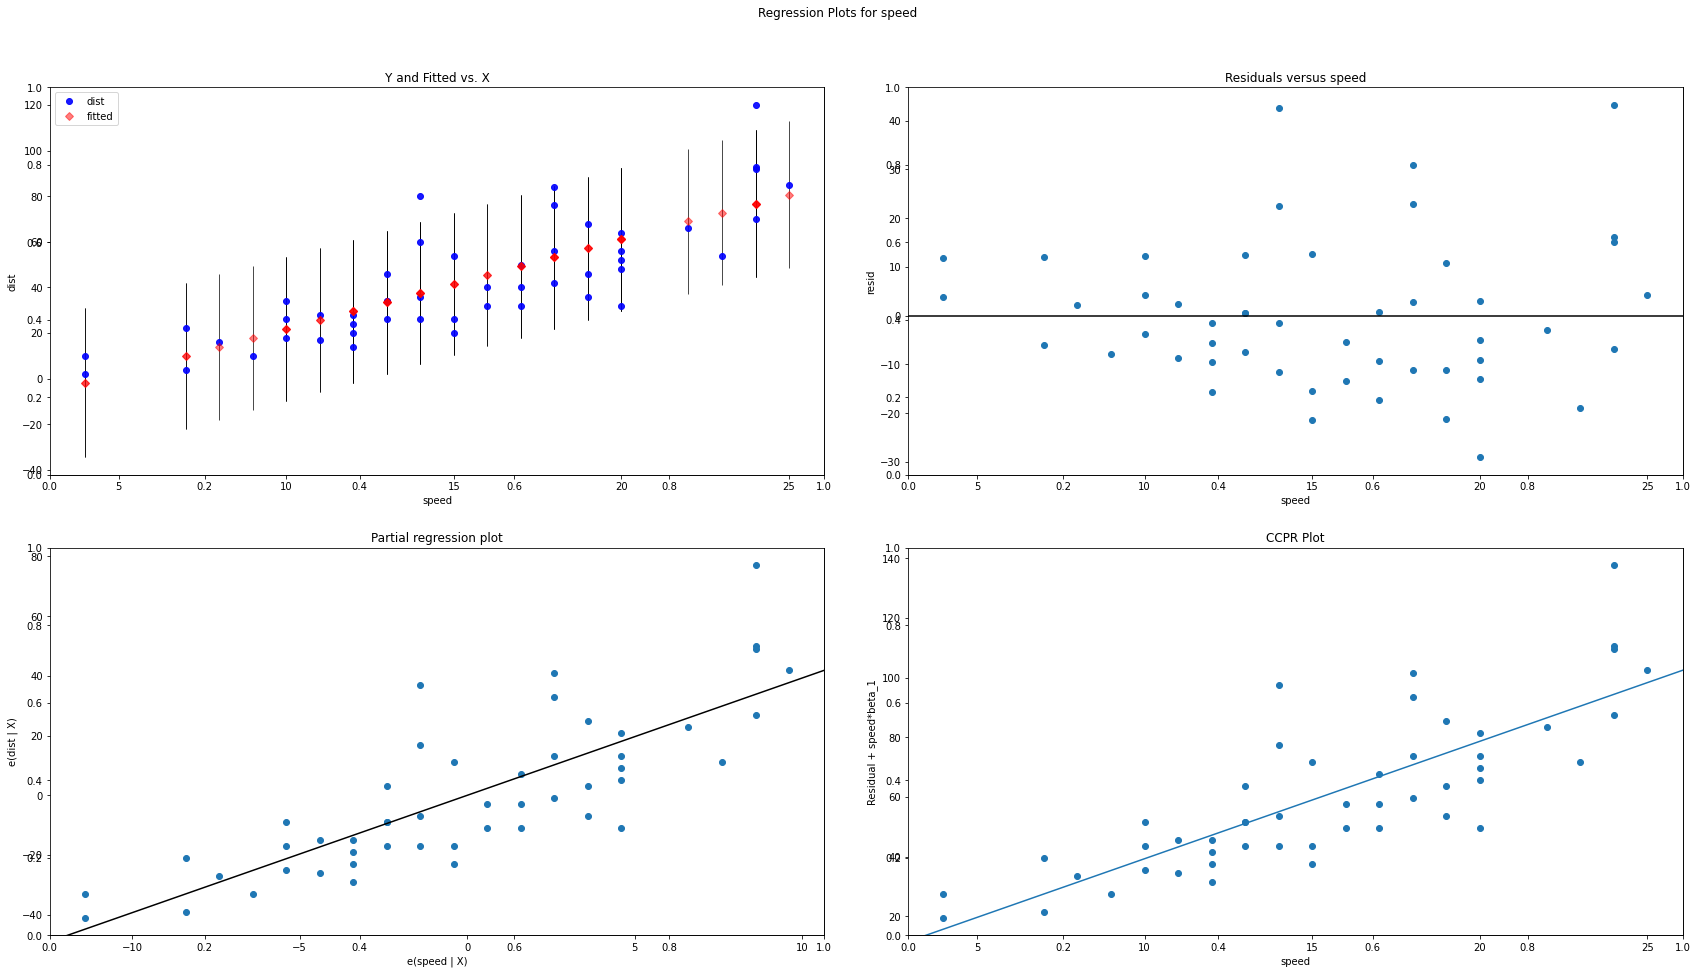

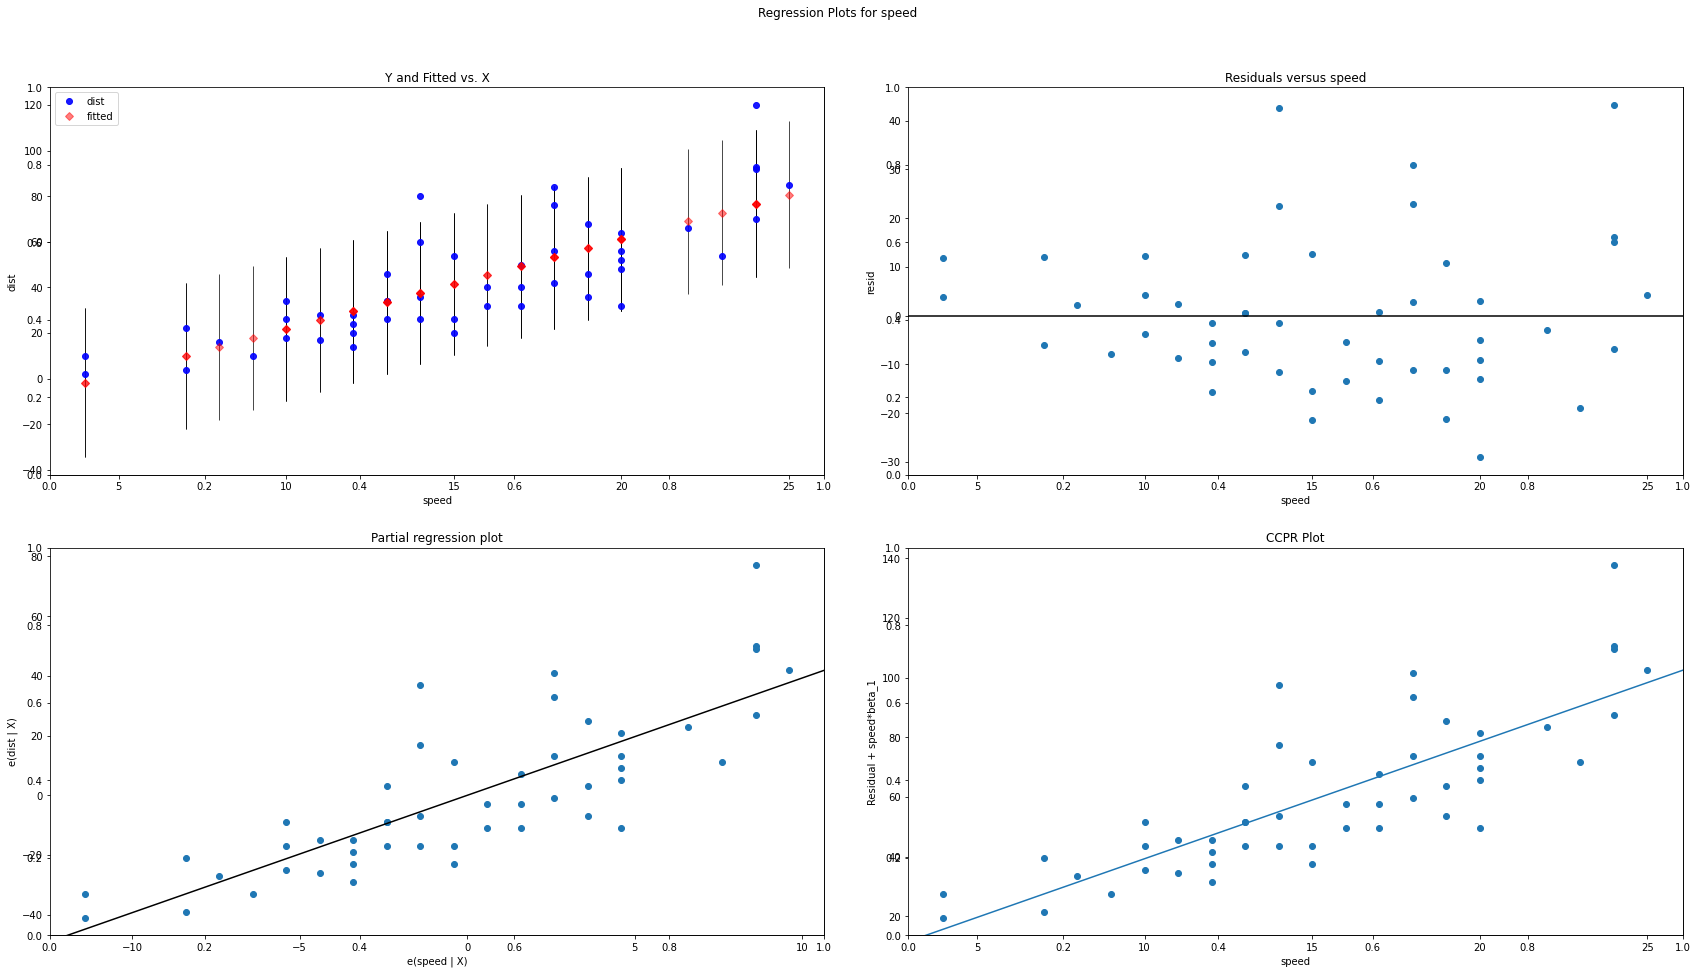

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24,14))
sm.graphics.plot_regress_exog(slr, 1, fig=fig) #plots diagnostics of predictor #1 aginst y.


For our purposes, we only want to focus on the one diagnostic of the *component-residual* plots.  For each predictor or feature in $x$, we should plot that predictor against the residuals and see if it looks like there's patterning.

Run the the fit_and_res_plot helper function from nb22 at the bottom of this notebook to replicate this with some autoformatting.

In [14]:
fit_and_res_plot(cars['speed'],cars['dist'])

NameError: name 'fit_and_res_plot' is not defined

#### These are a bit worrying: we have a lot of negative residuals where we overestimate speed in the middle of the data, and the residuals in general seem to expand or fan out as we move left-to-right!


## Leverage:
A last plot measures both leverage and outlier-ness.   Leverage is separation between data points in the $X$ direction, an outlier is a value with a large residuals (separation in hte $Y$ direction).  Outliers may be data points where your model didn't apply well for some reason; a high leverage point tend to "pull" the model in its direction.  This may make the overall model worse

Even so, it's rarely worth throwing away data!  Unless we have some reason to believe those high leverage data values are coming from a fundamentally different *process* than the rest of our data, we should use them to try to understand the underlying variability of what we're trying to model.

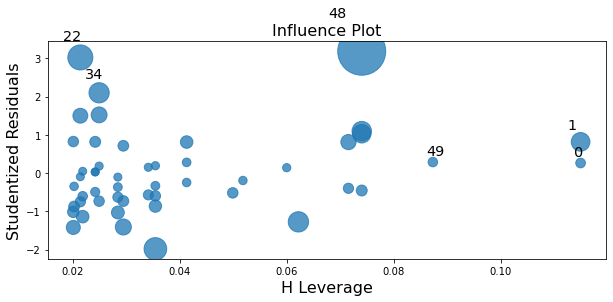

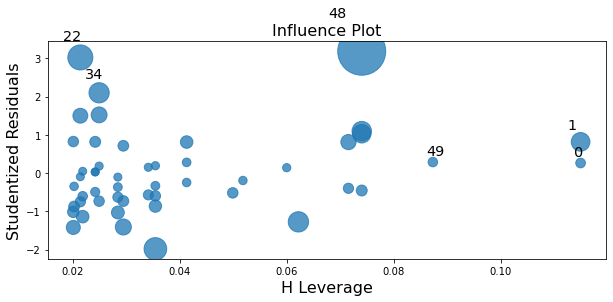

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
sm.graphics.influence_plot(slr, ax=ax, criterion="cooks")


### Consider Model Improvements: No Intercept

Since these are cars and their time-until-stopping, shouldn't a car that isn't moving take 0 distance to stop?  Let's force that into the model, in the form:

$distance= speed + error$

                                 OLS Regression Results                                
Dep. Variable:                   dist   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              423.5
Date:                Fri, 23 Apr 2021   Prob (F-statistic):                    9.23e-26
Time:                        10:27:18   Log-Likelihood:                         -209.87
No. Observations:                  50   AIC:                                      421.7
Df Residuals:                      49   BIC:                                      423.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

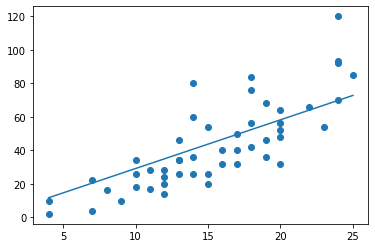

In [16]:
#Option 1: no intercept: use with caution!
y, X = dmatrices('dist ~ speed-1', data=cars, return_type='dataframe')
slr2=sm.OLS(y, X).fit()
print(slr2.summary())

plt.scatter(cars['speed'], cars['dist'])
plt.plot(cars['speed'], slr2.fittedvalues)

Why is the $R^2$ so "good"?  It turns out, if given a no-intercept model, Python sm computes $R^2 = 1 - \frac{\sum_i (y_i - \hat y_i)^2}{\sum_i y_i^2}$ instead of the usual $R^2 = 1 - \frac{\sum_i (y_i - \hat y_i)^2}{\sum_i (y_i - \bar
y)^2}$.  The change in the denominator "dominates" the new measure if your data was somewhat removed from (0,0) to begin with!

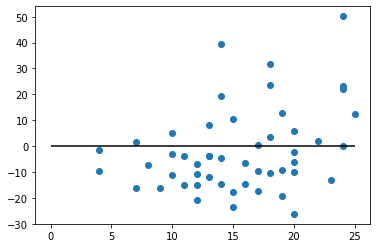

In [17]:
plt.scatter(cars['speed'], slr2.resid)
plt.hlines(0, xmin=0, xmax=25)
# sm.graphics.plot_regress_exog(slr2, 0, fig=fig) #plots diagnostics of predictor #1 aginst y.


(array([ 4., 11., 14.,  8.,  4.,  3.,  3.,  1.,  1.,  1.]),
 array([-26.18264288, -18.54629574, -10.90994859,  -3.27360145,
          4.36274569,  11.99909283,  19.63543998,  27.27178712,
         34.90813426,  42.5444814 ,  50.18082855]),
 <a list of 10 Patch objects>)

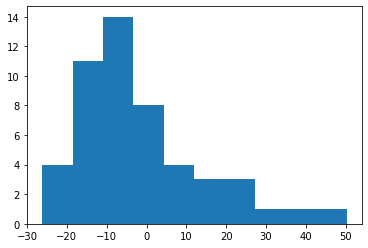

In [18]:
plt.hist(slr2.resid)

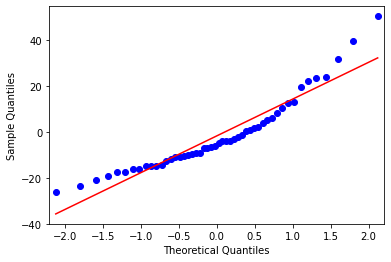

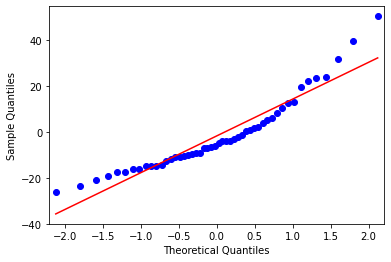

In [19]:
sm.qqplot(slr2.resid, stats.t, distargs=(len(y)-2,), line='s')

#### Discussion:
Arguments for new model:

> Logic of no intercept is good

Arguments against:

>Worse QQ plot
        
> Could use old intercept, but **don't extrapolate** results past or near zero

### Consider Model Improvements: A Quadratic model

I once took calculus!  I remember that for an object under constant acceleration or deceleration, the total velocity would be linear but the total distance moved would be quadratic. I think there might also be some upward concavity in the residuals.  Let's try to polynomial regression, adding a quadratic term!

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     47.14
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           5.85e-12
Time:                        10:27:29   Log-Likelihood:                -205.39
No. Observations:                  50   AIC:                             416.8
Df Residuals:                      47   BIC:                             422.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4701     14.817      0.167      0.8

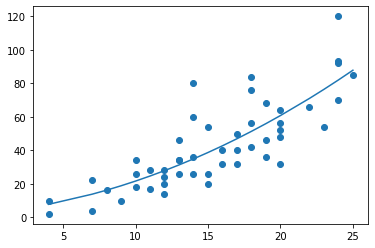

In [20]:
#let's try a multiple linear regression:; quadratic
cars['speedsq']=cars['speed']**2
y, X = dmatrices('dist ~ speed+speedsq', data=cars, return_type='dataframe')
mlrquad=sm.OLS(y, X).fit()
mlrquad.summary()

plt.scatter(cars['speed'], cars['dist'])
plt.plot(cars['speed'], mlrquad.fittedvalues)
print(mlrquad.summary())

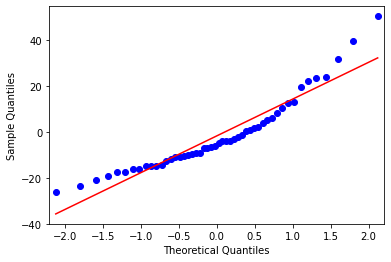

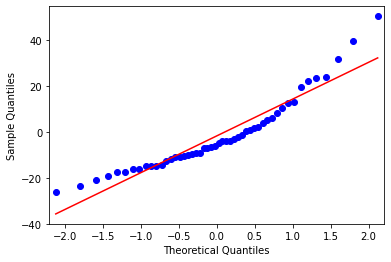

In [21]:
#Automated version: see topright
# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,4))
# sm.graphics.plot_regress_exog(mlrquad, 1, fig=fig) #plots diagnostics of predictor #1 aginst y.



# #or by hand: the 3 plots we really want:
sm.qqplot(slr2.resid, stats.t, distargs=(len(y)-2,), line='s')


(array([ 4., 11., 14.,  8.,  4.,  3.,  3.,  1.,  1.,  1.]),
 array([-26.18264288, -18.54629574, -10.90994859,  -3.27360145,
          4.36274569,  11.99909283,  19.63543998,  27.27178712,
         34.90813426,  42.5444814 ,  50.18082855]),
 <a list of 10 Patch objects>)

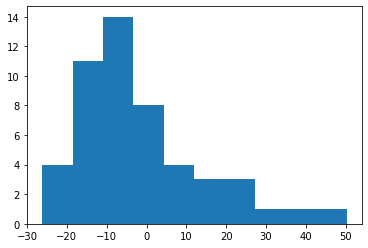

In [22]:
plt.hist(slr2.resid)

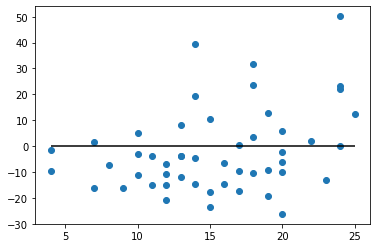

In [23]:
plt.scatter(cars['speed'], slr2.resid)
plt.hlines(0, xmin=min(cars['speed']), xmax=max(cars['speed']))

One note: for polynomial regression, it's not really necessary to make seperate plots for $(x, residuals)$ and $(x^2, residuals)$, since each are trying to answer the same thing: are we capturing the *movement* of X?


Takeaway: the curving of residuals is gone, but it should be more clear now that the magnitude of residuals is growing with speed.

### Consider Model Improvements: Modeling the Residuals:

#### *Not* expected practicum content, but kinda cool!

If we suspect that the residuals were increasing with $X$, e.g. as $E[|\varepsilon_i |] \propto \sqrt{X}$, then we need to divide the whole model by $\sqrt{x},$ use the new transformed variables to make a model, then multiply everything back to "recover" a linear fit.

In other words, starting with the model: $y_i=\beta_0+\beta_1 X_i + \varepsilon \cdot \sqrt{X_i}$

$\implies \frac{y_i}{\sqrt{X_i}}=\frac{\beta_0}{\sqrt{X_i}}+\beta_1 \frac{X_i}{\sqrt{X_i}} + \varepsilon$

and we feed the second line into *Python* as our linear model.  Observe that this is run as a two predictor, no intercept model!

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              209.8
Date:                Fri, 23 Apr 2021   Prob (F-statistic):                    1.87e-24
Time:                        10:27:39   Log-Likelihood:                         -136.85
No. Observations:                  50   AIC:                                      277.7
Df Residuals:                      48   BIC:                                      281.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

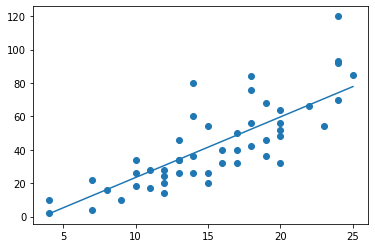

In [24]:
cars['sqx']=np.sqrt(cars['speed'])
cars['invsqx']=1/np.sqrt(cars['speed'])

newy=cars['dist']/np.sqrt(cars['speed'])

#how to NOT do add_constant in patsy.  otherwise just don't do the add constant!
y, X = dmatrices('dist ~ sqx+invsqx-1', data=cars, return_type='dataframe')
resmodel=sm.OLS(newy, X).fit()

#to see the results back in the units of the data frame, we have to multiple the sqrt(speed) back in
truefit=resmodel.fittedvalues*cars['sqx']

plt.scatter(cars['speed'], cars['dist'])
plt.plot(cars['speed'], truefit)

print(resmodel.summary())

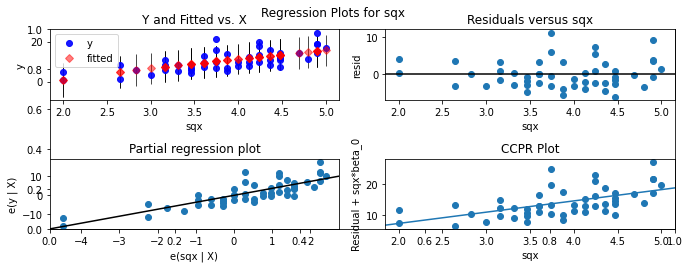

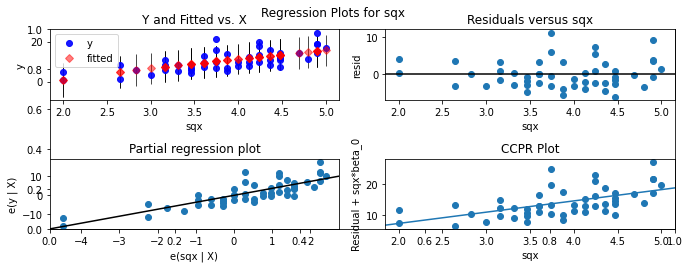

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
sm.graphics.plot_regress_exog(resmodel, 0, fig=fig) #plots diagnostics of predictor #1 aginst y.


Two final comments on the residual transformations:

> Note the new behavior near $x=0$, which is to be expected: we're dividing by terms approaching zero!.

> Our adjusted $R^2$ looks a lot lower, but it was also computed from a *different* response vector than the prior data sets.  To use this in direct comparison with other models, we'd want to compute the SSR and SSE by hand.  It also is using a no-intercept model, which is a different comparison!

## A Final Model:  Quadratic with growing residuals.

### Consider Model Improvements: Modeling the Residuals:
Combining these is perhaps a no-intercept quadratic: $y_i=\beta_1 X_i+\beta_2 X_i^2 + \varepsilon \cdot \sqrt{X_i}$

$\implies \frac{y_i}{\sqrt{X_i}}=\beta_1 \frac{X_i}{\sqrt{X_i}}+\beta_2 \frac{X_i^2}{\sqrt{X_i}}+ \varepsilon$


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              221.9
Date:                Fri, 23 Apr 2021   Prob (F-statistic):                    5.58e-25
Time:                        10:27:53   Log-Likelihood:                         -135.59
No. Observations:                  50   AIC:                                      275.2
Df Residuals:                      48   BIC:                                      279.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

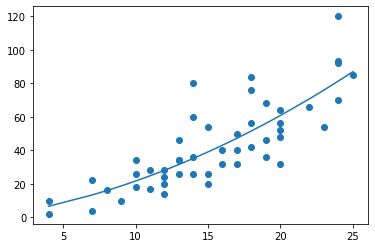

In [26]:
cars['x32']=cars['speed']**(3/2)
newy=cars['dist']/np.sqrt(cars['speed'])
y, X = dmatrices('dist ~ sqx + x32-1', data=cars, return_type='dataframe')

fm=sm.OLS(newy, X).fit()

truefit=fm.fittedvalues*cars['sqx']
plt.scatter(cars['speed'], cars['dist'])
plt.plot(cars['speed'], truefit)
print(fm.summary())

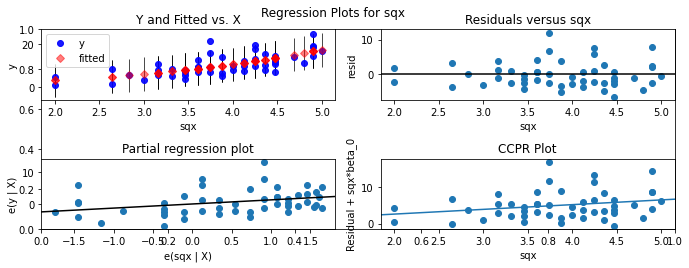

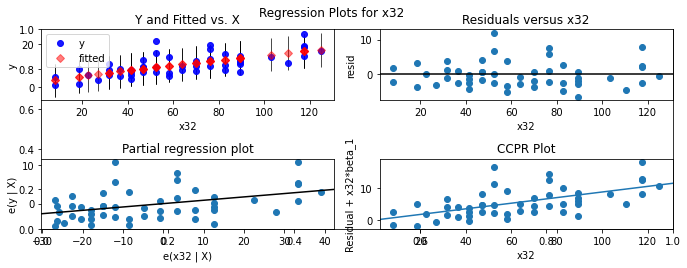

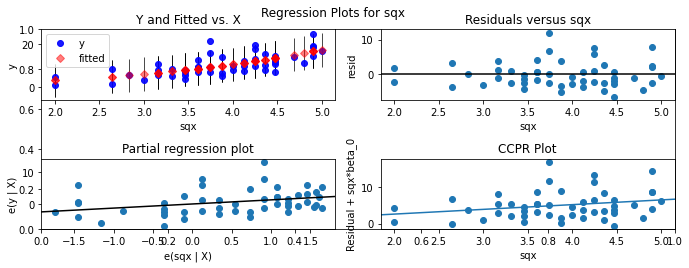

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
sm.graphics.plot_regress_exog(fm, 1, fig=fig) #plots diagnostics of predictor #1 aginst y.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
sm.graphics.plot_regress_exog(fm, 0, fig=fig) #plots diagnostics of predictor #0 aginst y.


By adjusted $R^2$ this is our best yet, but it's barely any better than the basic quadratic.  The advantage of this last model that included dividing by $\sqrt(x)$ is that we met the "residuals not growing with respect to the predictor" by nearly as much.  That means it's safer to use hypothesis tests, since the $t$ and $F$ tests **rely on normality**.  The model itself will be about the same, but the conclusions we can draw about it are weaker unless we check off all the assumptions!

## Helper:
From prior nb: an automated fit_and_res_plot if we want to skip typing `plt.plot(X,model.resid)`

In [28]:

def fit_and_res_plot(X, y, hint=False):
    
    if len(X.shape)==1:
        x = X
    else:
        x = X[:,0]
    
    # Fit Data 
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit() 
    
    # Print fitted model 
    print("Fitted PLR Model: yhat = ", end="")
    for p, beta in enumerate(model.params):
        print("{:.3f}".format(beta), end="")
        if p > 0: 
            print(" x^{} ".format(p), end="")
        else:
            print(" ", end="")
        if p != len(model.params)-1:
            print("+ ", end="")
            
    # Plot data/fit 
    yhat = model.predict(X)
    res = y - yhat 
    xp = np.linspace(np.min(x), np.max(x), 50)
    yp = np.zeros(len(xp))
    for p, beta in enumerate(model.params):
        yp += beta * xp**p 
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
    axes[0].scatter(x, y, color="steelblue", s=100, alpha=0.9)
    axes[0].plot(xp, yp, color="steelblue", lw=3)
    axes[0].grid(alpha=0.25)
    axes[0].set_xlabel("X", fontsize=16)
    axes[0].set_ylabel("Y", fontsize=16)
    axes[0].set_title("Data and PLR Fit", fontsize=16)
    
    # Plot residuals 
    axes[1].plot([np.min(x), np.max(x)], [0, 0], lw=2, ls="--", alpha=0.5, color="black")
    axes[1].scatter(x, res, color="#6a9373", s=100, alpha=0.9)
    axes[1].grid(alpha=0.25)
    axes[1].set_xlabel("X", fontsize=16)
    axes[1].set_ylabel("Res", fontsize=16)
    axes[1].set_title("Residual Plot", fontsize=16)
    